In [0]:
! pip install fastai

In [0]:

from fastai.text import *
import pandas as pd
import numpy as np



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/ULMfit/text_data_hackerearth_new.csv')

In [0]:
dataset.tail()

,id,cleaned_text,label,train_flag
4617,1.245219e+18,Happy Mothers Day you crazy bitch Im sorry cov...,1,0
4618,1.245882e+18,Mum cant get to the bingo so we brought the bi...,1,0
4619,1.246461e+18,Despite all this bullshit today has been one o...,1,0
4620,1.246245e+18,Happy Mothers Day Firstly to my Queen danieles...,1,0
4621,1.245178e+18,Mothers Day Walk When you live in a tiny villa...,1,0


In [0]:
dataset = dataset[dataset['train_flag']==0]

In [0]:
test = dataset[['id','cleaned_text']]

In [0]:
test.reset_index(drop=True, inplace=True)

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/ULMfit/balanced_train_dataset.csv')

In [0]:
train_df.head()

,id,cleaned_text,label
0,1.244244e+18,happy mothers day to all the amazing mums out ...,0
1,1.243923e+18,happy mothers day to my super mum ochie dike n...,1
2,1.246533e+18,thismorning happy mothers day mum we miss you ...,0
3,1.244366e+18,happy mothers day to our mothers and intending...,1
4,1.243976e+18,ndi nne mama happy mothers day to the anglican...,2


In [0]:

train = train_df[['label','cleaned_text']]
train.head()

,label,cleaned_text
0,0,happy mothers day to all the amazing mums out ...
1,1,happy mothers day to my super mum ochie dike n...
2,0,thismorning happy mothers day mum we miss you ...
3,1,happy mothers day to our mothers and intending...
4,2,ndi nne mama happy mothers day to the anglican...


In [0]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(train, stratify = train['label'], test_size = 0.15)

df_trn.shape, df_val.shape

((4337, 2), (766, 2))

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [0]:

data_clas.show_batch()

text,target
xxbos happy mothers day to my mum up in heaven i miss our chats i miss our hugs i miss everything you do miss your voice on the phone your advice on things when i need to talk to you you are in my mind always and my dreams i think of you every single day i love you mum so much xx xxunk,0
xxbos thismorning happy mothers day to my amazing mum she is the rock in all our lives and this is doubly sad for us as we lost my dad in january my poor mum is lonely enough and now we can not visit her please show this message to cheer her up and let her know how much we love her pictwittercomufmkhbvdyd,0
xxbos happy mothers day mum x today we can not hug we can not kiss have to keep you safe today just a wave through the window so i can see your face it is the best thing to do and i hope and pray that i will be able to kiss and hug you next mothers day love you mum xx,1
xxbos i am going xxunk crazy already but i know i d rather be in my house safe than out there with people who doing give a xxunk xxunk i have no immune system to speak of due to xxunk d xxunk so i am very xxunk oh by the way happy mothers day to all mothers out there be safe,1
xxbos just want to wish all those beautiful mothers out there a happy mothers day my mum is in isolation but i am lucky i am able to look through the window to see her face i am ready for what this week throws at me in school and to all the fabulous key workers thankyou for all you do x,2


In [0]:
# data_lm.save('/content/drive/My Drive/ULMfit/5_June/data_lm_export.pkl')
# data_clas.save('/content/drive/My Drive/ULMfit/5_June/data_clas_export.pkl')
data_lm = load_data('/content/drive/My Drive/ULMfit/5_June', 'data_lm_export.pkl')
data_clas = load_data('/content/drive/My Drive/ULMfit/5_June', 'data_clas_export.pkl', bs=32)

# Create and train the Language Model

In [0]:

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 6.31E-02


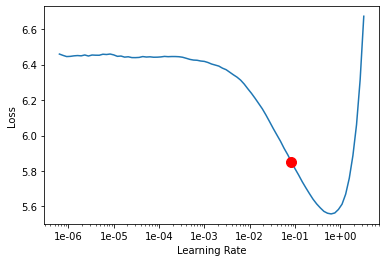

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
# min_grad_lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(3, 0.098)

epoch,train_loss,valid_loss,accuracy,time
0,4.770365,3.665581,0.338170,00:03
1,3.927353,3.174653,0.401935,00:03
2,3.315996,3.011041,0.431138,00:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.75E-03


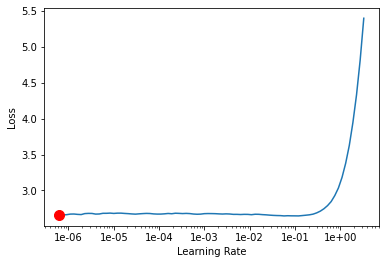

In [0]:

learn.freeze_to(-1)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(3, 1e-06/2)

epoch,train_loss,valid_loss,accuracy,time
0,2.669571,3.010213,0.431548,00:03
1,2.677054,3.009542,0.431771,00:03
2,2.671242,3.008958,0.430171,00:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 3.31E-03


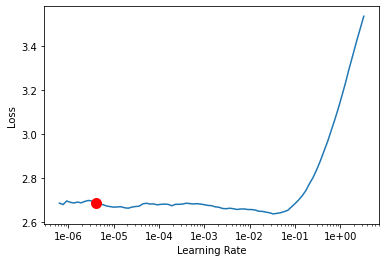

In [0]:

learn.freeze_to(-2)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(3,1e-05)

epoch,train_loss,valid_loss,accuracy,time
0,2.662857,3.008061,0.432180,00:03
1,2.671721,3.004367,0.432478,00:03
2,2.669628,3.004539,0.431436,00:03


In [0]:
learn.save_encoder('/content/drive/My Drive/ULMfit/5_June/ft_enc_unfreezing_last_layer')

In [0]:
learn.predict("Happy mum",n_words=7)

'Happy mum to all the mums out there she'

# Performing Classification

In [0]:
text_classifier_learner??

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult= 0.7,max_len=128,bptt=32)
learn.load_encoder('/content/drive/My Drive/ULMfit/5_June/ft_enc_unfreezing_last_layer')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (4337 items)
x: TextList
xxbos happy mothers day to all you amazing mums head over to our facebook page to read the write up pictwittercomwuz0cqjzxd,xxbos the best boy in the whole my xxunk xxunk warrior rory up for a in the middle of the night as his xxunk were xxunk but back in bed all xxunk full of love xxunk i love that i am his mum happy mothers day everyone lots of love xxunk rory xxunk,xxbos oh xxunk had a xxunk weekend if i am honest with dad and mothers day very xxunk and emotional but i am fine now we just need to xxunk on the here and now smile and be happy stay safe and well and xxunk it out right i am on my xxunk bike for half hour pray 0 me,xxbos happy mothers day to our gorgeous mummys its a strange one this year stay safe everyone compbdlvirlbin igshid = zbjjtr00jasg,xxbos well as i posted that old photo of sam with her mum earlier sam has insisted that i post an old one of me with my mum too here we are along with my

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 8.32E-03


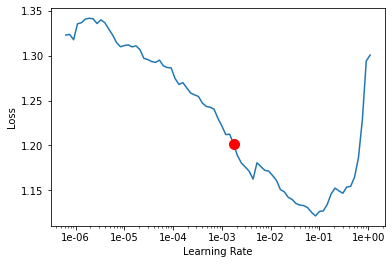

In [0]:

learn.lr_find()
learn.recorder.plot(suggestion=True)
# min_grad_lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(3, 0.0033)

epoch,train_loss,valid_loss,accuracy,time
0,0.937112,1.053484,0.552219,00:03
1,0.875601,0.968935,0.574413,00:03
2,0.833351,0.947469,0.601828,00:03


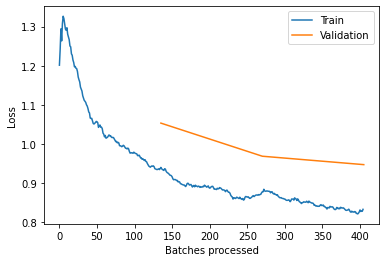

In [0]:

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-04
Min loss divided by 10: 7.59E-08


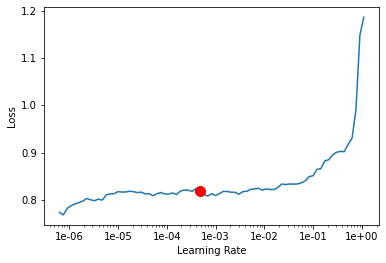

In [0]:

learn.freeze_to(-1)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(2,1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.818936,0.970013,0.614883,00:03
1,0.804089,0.941816,0.613577,00:03


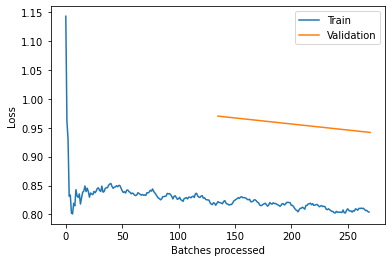

In [0]:

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06
Min loss divided by 10: 3.02E-06


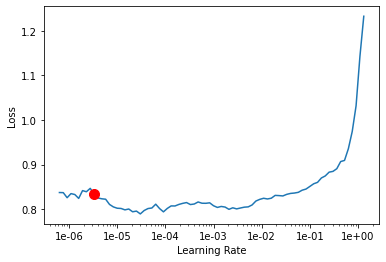

In [0]:

learn.freeze_to(-2)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(3,0.0000055, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.806781,0.921401,0.625326,00:03
1,0.793239,0.929940,0.624021,00:03
2,0.815209,0.956948,0.599217,00:03


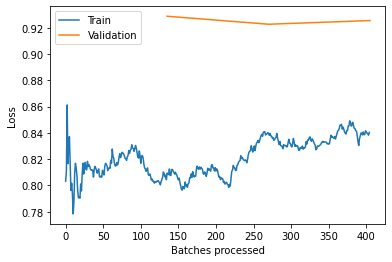

In [0]:

learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.10E-05


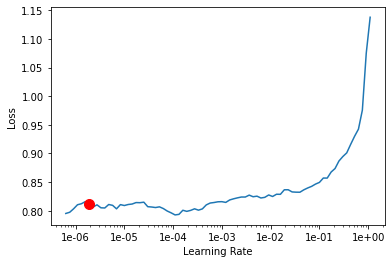

In [0]:

learn.freeze_to(-3)
# learn.fit_one_cycle(5, 1e-1)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(3, 0.0000022,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.827902,1.002779,0.604439,00:04
1,0.813296,1.020788,0.603133,00:04
2,0.822967,0.987379,0.613577,00:04


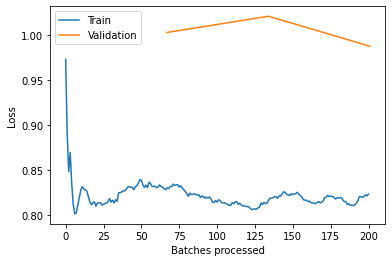

In [0]:

learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.45E-02


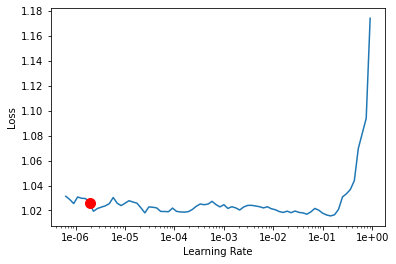

In [0]:

learn.freeze_to(-4)

learn.lr_find()
learn.recorder.plot(suggestion=True)
#learn.fit_one_cycle(5,1e-1)

In [0]:
learn.fit_one_cycle(7, slice(1e-06,1e-01))
# learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,1.026273,1.059775,0.524202,00:02
1,1.041438,1.035576,0.524202,00:02
2,1.060018,1.063951,0.524202,00:02
3,1.047866,1.058103,0.516993,00:02
4,1.038826,1.023690,0.525232,00:02
5,1.030913,1.023126,0.525232,00:02
6,1.024953,1.021728,0.525232,00:02


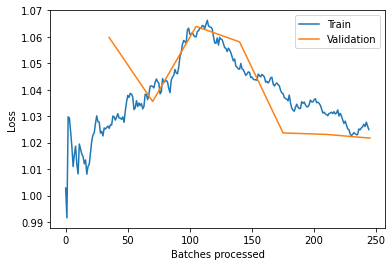

In [0]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 6.31E-08


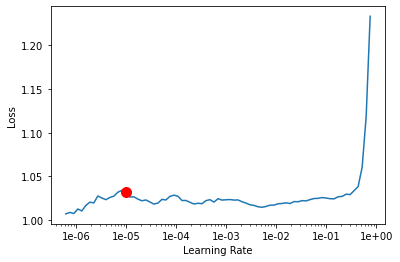

In [0]:

learn.freeze_to(-4)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(50, 1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,1.018084,1.021869,0.525232,00:02
1,1.018348,1.021696,0.525232,00:02
2,1.020538,1.021826,0.525232,00:02
3,1.021345,1.021766,0.525232,00:02
4,1.020900,1.021756,0.525232,00:02
5,1.021693,1.021871,0.525232,00:02
6,1.020388,1.021907,0.525232,00:02
7,1.021263,1.021880,0.525232,00:02
8,1.021984,1.021888,0.525232,00:02
9,1.021992,1.021697,0.525232,00:02


In [0]:

learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-1/100, 1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,1.027520,1.032680,0.525232,00:08
1,1.045028,1.036081,0.526262,00:08
2,1.047126,1.026387,0.525232,00:08
3,1.034773,1.022638,0.525232,00:08


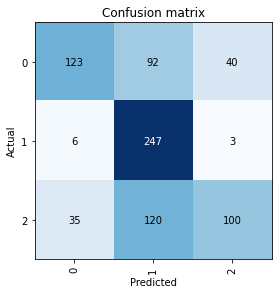

In [0]:
# Plotting confusion matrix 
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [0]:
learn.predict('Hello mum Happy mothers day')

(Category tensor(1), tensor(1), tensor([0.0609, 0.7625, 0.1766]))

In [0]:
learn.predict('Hello mum Happy mothers day Hope to see you soooon')

(Category tensor(1), tensor(1), tensor([0.0569, 0.8540, 0.0891]))

In [0]:
learn.predict('sorry mum Happy mothers day')

(Category tensor(1), tensor(1), tensor([0.0824, 0.8195, 0.0981]))

In [0]:
learn.save_encoder('/content/drive/My Drive/ULMfit/5_June/downstream_classifier_model_1')

In [0]:
learn.predict('happy mothers day to my mum up in heaven i miss our chats i miss our hugs i miss everything you do miss your voice on the phone your advice on things when i need to talk to you you are in my mind always and my dreams i think of you every single day i love you mum so much ')

(Category tensor(1), tensor(1), tensor([0.3422, 0.4315, 0.2263]))

In [0]:
def label_predict(data):
    p = learn.predict(data)
    return p[1].item()

In [0]:
test['sentiment_class'] = test['cleaned_text'].apply(lambda x : label_predict(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
test.head()

,id,cleaned_text,sentiment_class
0,1.246628e+18,0 Yeah I once cooked potatoes when I was 0 yea...,0
1,1.245898e+18,Happy Mothers Day to all the mums stepmums gra...,1
2,1.244717e+18,I love the people from the UK however when I a...,1
3,1.245730e+18,Happy 00st Birthday Happy Mothers Day to my mu...,2
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,1


In [0]:
test['sentiment_class'].value_counts()

1    1235
2      95
0      57
Name: sentiment_class, dtype: int64

In [0]:
test.to_csv('/content/drive/My Drive/ULMfit/5_June/test_file_1.csv')